<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/DailyChallenge_week4_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import and Cleaning:

**Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.**



In [3]:
import pandas as pd

df = pd.read_csv('/content/global_power_plant_database.csv')
# print(df.head)
# df.columns


# missing val
print(df.isnull().sum())


country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


<ipython-input-3-08f4c6008dea>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/global_power_plant_database.csv')


In [4]:
print(df.dtypes) # check types

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [5]:
#Converting data to number format
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

# Fill missing categorical values!
df['primary_fuel'] = df['primary_fuel'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['ommissioning_year'] = df['commissioning_year'].fillna('Unknown')
df['capacity_mw'] = df['capacity_mw'].fillna(df['capacity_mw'].median()) # Using the median helps reduce the impact of outliers compared to the mean.

print(df.isnull().sum())

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


# Exploratory Data Analysis:



##Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.

In [6]:
# capacity_mw                       float64
# latitude                          float64
# longitude                         float6
# year_of_capacity_data             float64
# generation_gwh_2013               float64
# generation_gwh_2014               float64
# commissioning_year                float64


numerical_stats = df[['capacity_mw']].describe()
print(numerical_stats)
numerical_stats = df[['latitude']].describe()
print(numerical_stats)
numerical_stats = df[['longitude']].describe()
print(numerical_stats)
numerical_stats = df[['commissioning_year']].describe()
print(numerical_stats)

        capacity_mw
count  34936.000000
mean     163.355148
std      489.636072
min        1.000000
25%        4.900000
50%       16.745000
75%       75.344250
max    22500.000000
           latitude
count  34936.000000
mean      32.816637
std       22.638603
min      -77.847000
25%       29.256475
50%       39.727750
75%       46.263125
max       71.292000
          longitude
count  34936.000000
mean      -6.972803
std       78.405850
min     -179.977700
25%      -77.641550
50%       -2.127100
75%       49.502675
max      179.388700
       commissioning_year
count        17447.000000
mean          1997.414823
std             23.397835
min           1896.000000
25%           1988.000000
50%           2007.000000
75%           2014.000000
max           2020.000000


**Interquartile Range (IQR) method**
*latitude*

Q1 = 29.256475 (25 %)

Q3= 46.263125 (75 %)

IQR = Q3 - Q1

Boundries:

lower-  Q1- 1.5 * IQR

upper- Q3+ 1.5 * IQR

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017',
       'ommissioning_year'],
      dtype='object')

##Explore the distribution of power plants by country and fuel type.

Country – It counts the number of power plants in each country.
Fuel Type – It counts the number of power plants by their primary fuel type.

In [8]:
# power plants by country
country_counts = df['country'].value_counts()
print(country_counts.head(4))

#by fuel type
fuel_counts = df['primary_fuel'].value_counts()
print(fuel_counts.head(7))

country
USA    9833
CHN    4235
GBR    2751
BRA    2360
Name: count, dtype: int64
primary_fuel
Solar      10665
Hydro       7156
Wind        5344
Gas         3998
Coal        2330
Oil         2320
Biomass     1430
Name: count, dtype: int64


#Statistical Analysis:

##Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.

In [9]:
import numpy as np

fuel_groups = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.std ,'count']) # .agg([...]) applies multiple aggregation functions
print(fuel_groups)

                       mean          std  count
primary_fuel                                   
Biomass           23.972938    39.461805   1430
Coal             843.579828   888.187187   2330
Cogeneration      98.731707   283.428252     41
Gas              373.449375   560.934146   3998
Geothermal        67.130952   114.640890    189
Hydro            147.171551   549.809328   7156
Nuclear         2091.855179  1303.509273    195
Oil              112.878754   392.009039   2320
Other             84.020000   145.891392     43
Petcoke          202.048125   476.986459     12
Solar             17.657039    41.939412  10665
Storage           12.683704    35.574631    135
Waste             13.809657    20.582503   1068
Wave and Tidal    55.220000   101.440708     10
Wind              49.224126   106.138355   5344


<ipython-input-9-aadaa72e6c99>:3: FutureWarning: The provided callable <function mean at 0x7b880dba5f80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fuel_groups = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.std ,'count']) # .agg([...]) applies multiple aggregation functions
<ipython-input-9-aadaa72e6c99>:3: FutureWarning: The provided callable <function std at 0x7b880dba60c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  fuel_groups = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.std ,'count']) # .agg([...]) applies multiple aggregation functions


Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

How to Conduct Hypothesis Testing:

Define Null and Alternative Hypotheses.

Choose a significance level (alpha, typically 0.05).

Calculate the test statistic and p-value from the sample data.

Compare the p-value with the alpha level to accept or reject the Null Hypothesis

In [10]:
pwr_fuel = df.groupby('primary_fuel')['capacity_mw']
print(pwr_fuel.head(10))

# print(pwr_fuel.describe())  # Описание данных по каждому виду топлива
print(df["primary_fuel"].unique())
print(df["primary_fuel"].nunique())



0         33.0
1         10.0
2         10.0
3         66.0
4        100.0
         ...  
31160      4.7
31389     27.3
32372    140.4
32417      7.6
33419      6.0
Name: capacity_mw, Length: 150, dtype: float64
['Hydro' 'Solar' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Waste'
 'Biomass' 'Wave and Tidal' 'Petcoke' 'Geothermal' 'Storage'
 'Cogeneration']
15


In [11]:
import itertools
import numpy as np
from scipy import stats

# Get unique fuel types
fuel_types = df['primary_fuel'].unique()

# Create a dictionary because wa have plant of typees
fuel_capacities = {fuel: df[df['primary_fuel'] == fuel]['capacity_mw'].dropna() for fuel in fuel_types}

# Perform pairwise t-tests between fuel types
for fuel1, fuel2 in itertools.combinations(fuel_types, 2):  # Iterate over all unique pairs
    cap1, cap2 = fuel_capacities[fuel1], fuel_capacities[fuel2]

    if len(cap1) > 1 and len(cap2) > 1:
        t_statistic, p_value = stats.ttest_ind(cap1, cap2, equal_var=False)  # Welch’s t-test
        print(f"{fuel1} vs {fuel2}: T-statistic = {t_statistic:.4f}, P-value = {p_value:.4f}")

        if p_value < 0.05:
            print(f"{fuel1} vs {fuel2}: Significant difference in mean power output.")
        else:
            print(f"{fuel1} vs {fuel2}: No significant difference in mean power output.")
    else:
        print(f"{fuel1} vs {fuel2}: Not enough data for t-test")





Hydro vs Solar: T-statistic = 19.8882, P-value = 0.0000
Hydro vs Solar: Significant difference in mean power output.
Hydro vs Gas: T-statistic = -20.5755, P-value = 0.0000
Hydro vs Gas: Significant difference in mean power output.
Hydro vs Other: T-statistic = 2.7246, P-value = 0.0089
Hydro vs Other: Significant difference in mean power output.
Hydro vs Oil: T-statistic = 3.2925, P-value = 0.0010
Hydro vs Oil: Significant difference in mean power output.
Hydro vs Wind: T-statistic = 14.7076, P-value = 0.0000
Hydro vs Wind: Significant difference in mean power output.
Hydro vs Nuclear: T-statistic = -20.7827, P-value = 0.0000
Hydro vs Nuclear: Significant difference in mean power output.
Hydro vs Coal: T-statistic = -35.6867, P-value = 0.0000
Hydro vs Coal: Significant difference in mean power output.
Hydro vs Waste: T-statistic = 20.4233, P-value = 0.0000
Hydro vs Waste: Significant difference in mean power output.
Hydro vs Biomass: T-statistic = 18.7155, P-value = 0.0000
Hydro vs Biom

#Time Series Analysis:


If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.


In [12]:
yearly_counts = df['commissioning_year'].value_counts().sort_index()# counts how many power plants were commissioned each year,sorts the counts in ascending order by year.
print(yearly_counts)

years = yearly_counts.index.to_numpy() #  Gets the years as a NumPy array
counts = yearly_counts.values #  Gets the corresponding number of plants commissioned per year.

window = 20 # uses a rolling window of 20 years.
moving_avg = np.convolve(counts, np.ones(window)/window, mode='valid')
print(moving_avg)

commissioning_year
1896.000000      1
1899.000000      1
1900.000000      6
1901.000000      2
1902.000000      4
              ... 
2019.000000    596
2019.000000      1
2019.411765      1
2019.796326      1
2020.000000    150
Name: count, Length: 2023, dtype: int64
[ 3.05  3.25  3.25 ... 61.2  61.2  68.65]


In [13]:
fuel_by_year = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)
#Counts the number of occurrences (power plants) for each (year, fuel type) combination.
#Converts the grouped data into a table format
print(fuel_by_year)

primary_fuel        Hydro   Gas  Oil  Biomass  Coal  Other  Waste  \
commissioning_year                                                  
1896.000000           1.0   0.0  0.0      0.0   0.0    0.0    0.0   
1899.000000           1.0   0.0  0.0      0.0   0.0    0.0    0.0   
1900.000000           3.0   1.0  2.0      0.0   0.0    0.0    0.0   
1901.000000           2.0   0.0  0.0      0.0   0.0    0.0    0.0   
1902.000000           4.0   0.0  0.0      0.0   0.0    0.0    0.0   
...                   ...   ...  ...      ...   ...    ...    ...   
2019.000000           1.0  34.0  2.0      2.0   0.0    0.0    3.0   
2019.000000           0.0   0.0  1.0      0.0   0.0    0.0    0.0   
2019.411765           0.0   0.0  0.0      0.0   0.0    0.0    0.0   
2019.796326           0.0   0.0  0.0      0.0   0.0    0.0    0.0   
2020.000000           0.0   6.0  0.0      1.0   0.0    0.0    2.0   

primary_fuel        Cogeneration  Petcoke  Nuclear  Geothermal  Wind  Solar  \
commissioning_year     

#Advanced Visualization


Create visualizations using Matplotlib and Seaborn to illustrate your findings.

Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.


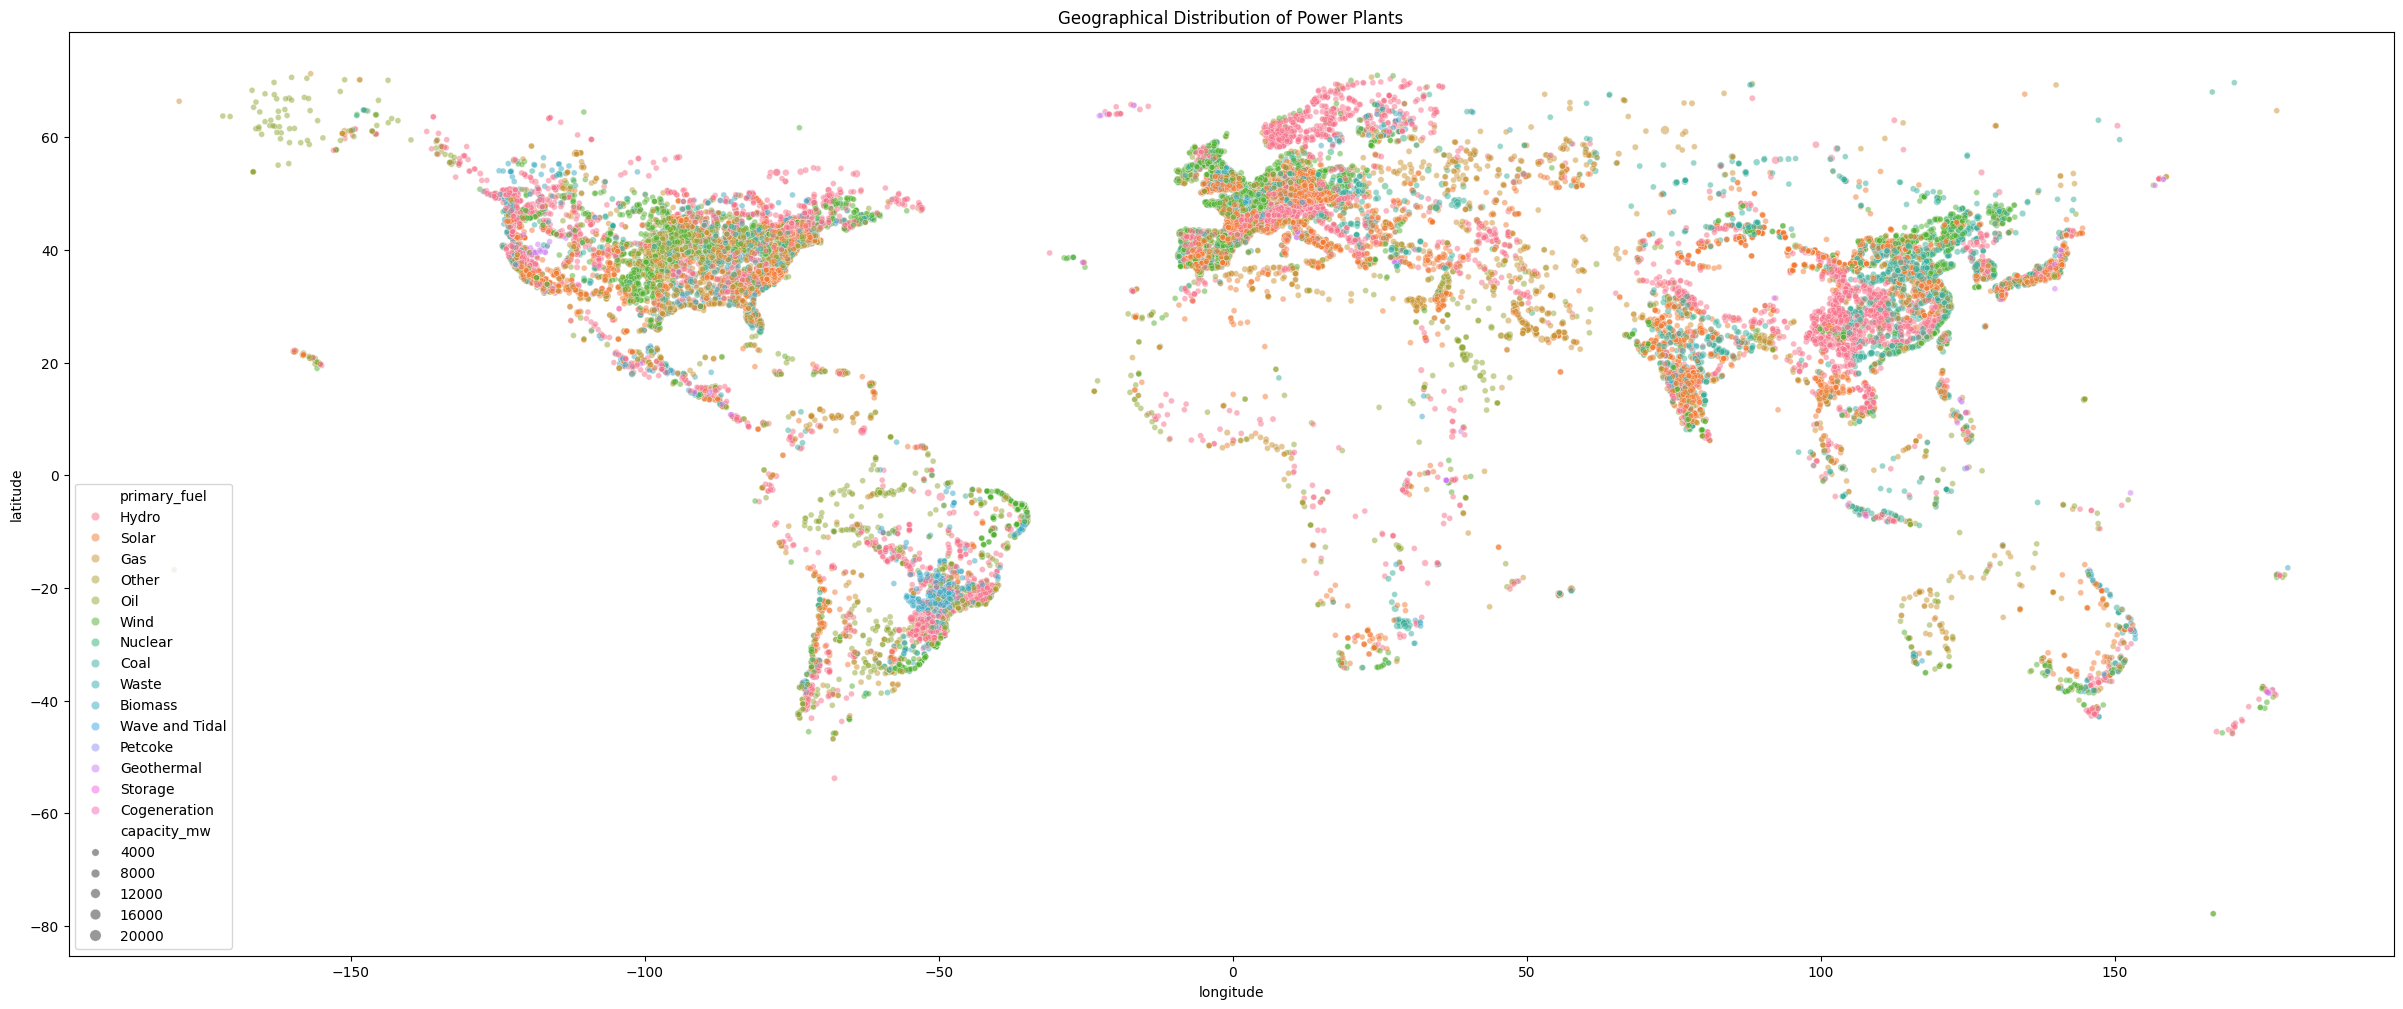

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 12))
sns.scatterplot(x='longitude', y='latitude', size='capacity_mw', hue='primary_fuel', data=df, alpha=0.5)
plt.title('Geographical Distribution of Power Plants')
plt.show()

In [15]:
!pip install basemap basemap-data


**Using a basemap for more beautiful maps**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


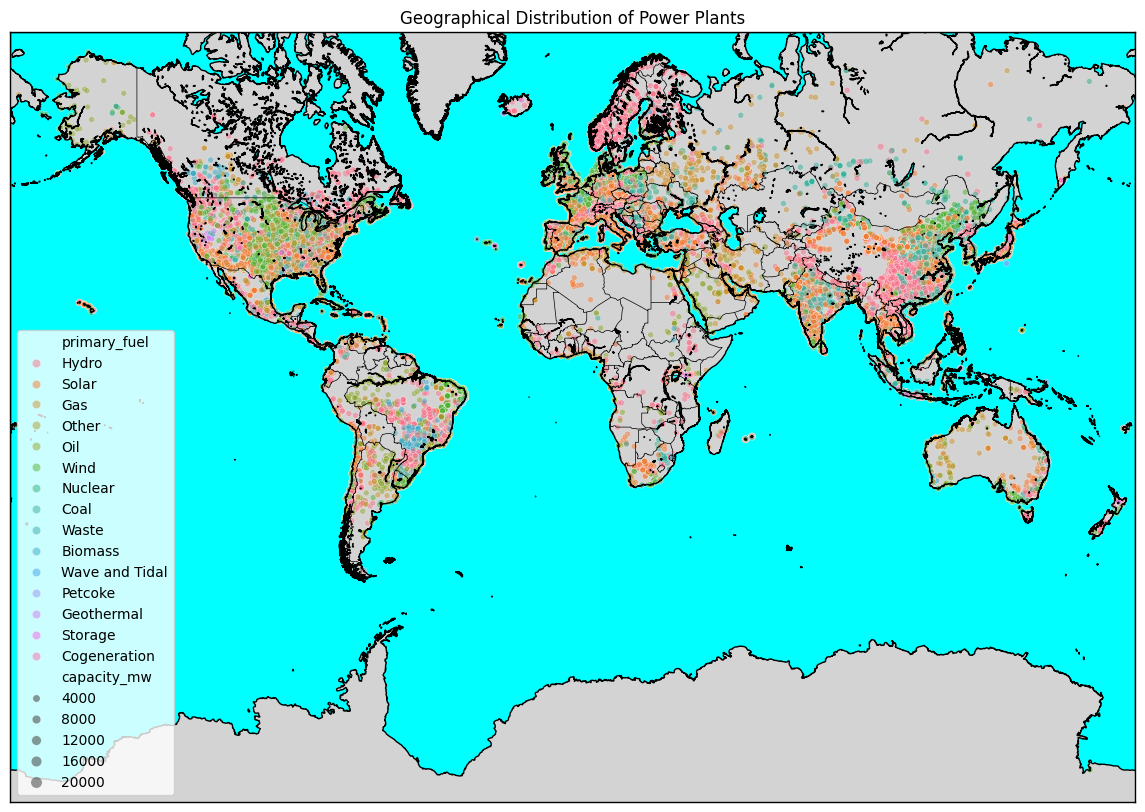

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap


min_lon, max_lon = df['longitude'].min(), df['longitude'].max()
min_lat, max_lat = df['latitude'].min(), df['latitude'].max()

plt.figure(figsize=(15, 10))


m = Basemap(projection='merc',
            llcrnrlon=min_lon - 2, urcrnrlon=max_lon + 2,
            llcrnrlat=min_lat - 2, urcrnrlat=max_lat + 2,
            resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')


x, y = m(df['longitude'].values, df['latitude'].values)


sns.scatterplot(x=x, y=y, size=df['capacity_mw'], hue=df['primary_fuel'], alpha=0.5)

plt.title('Geographical Distribution of Power Plants')
plt.show()



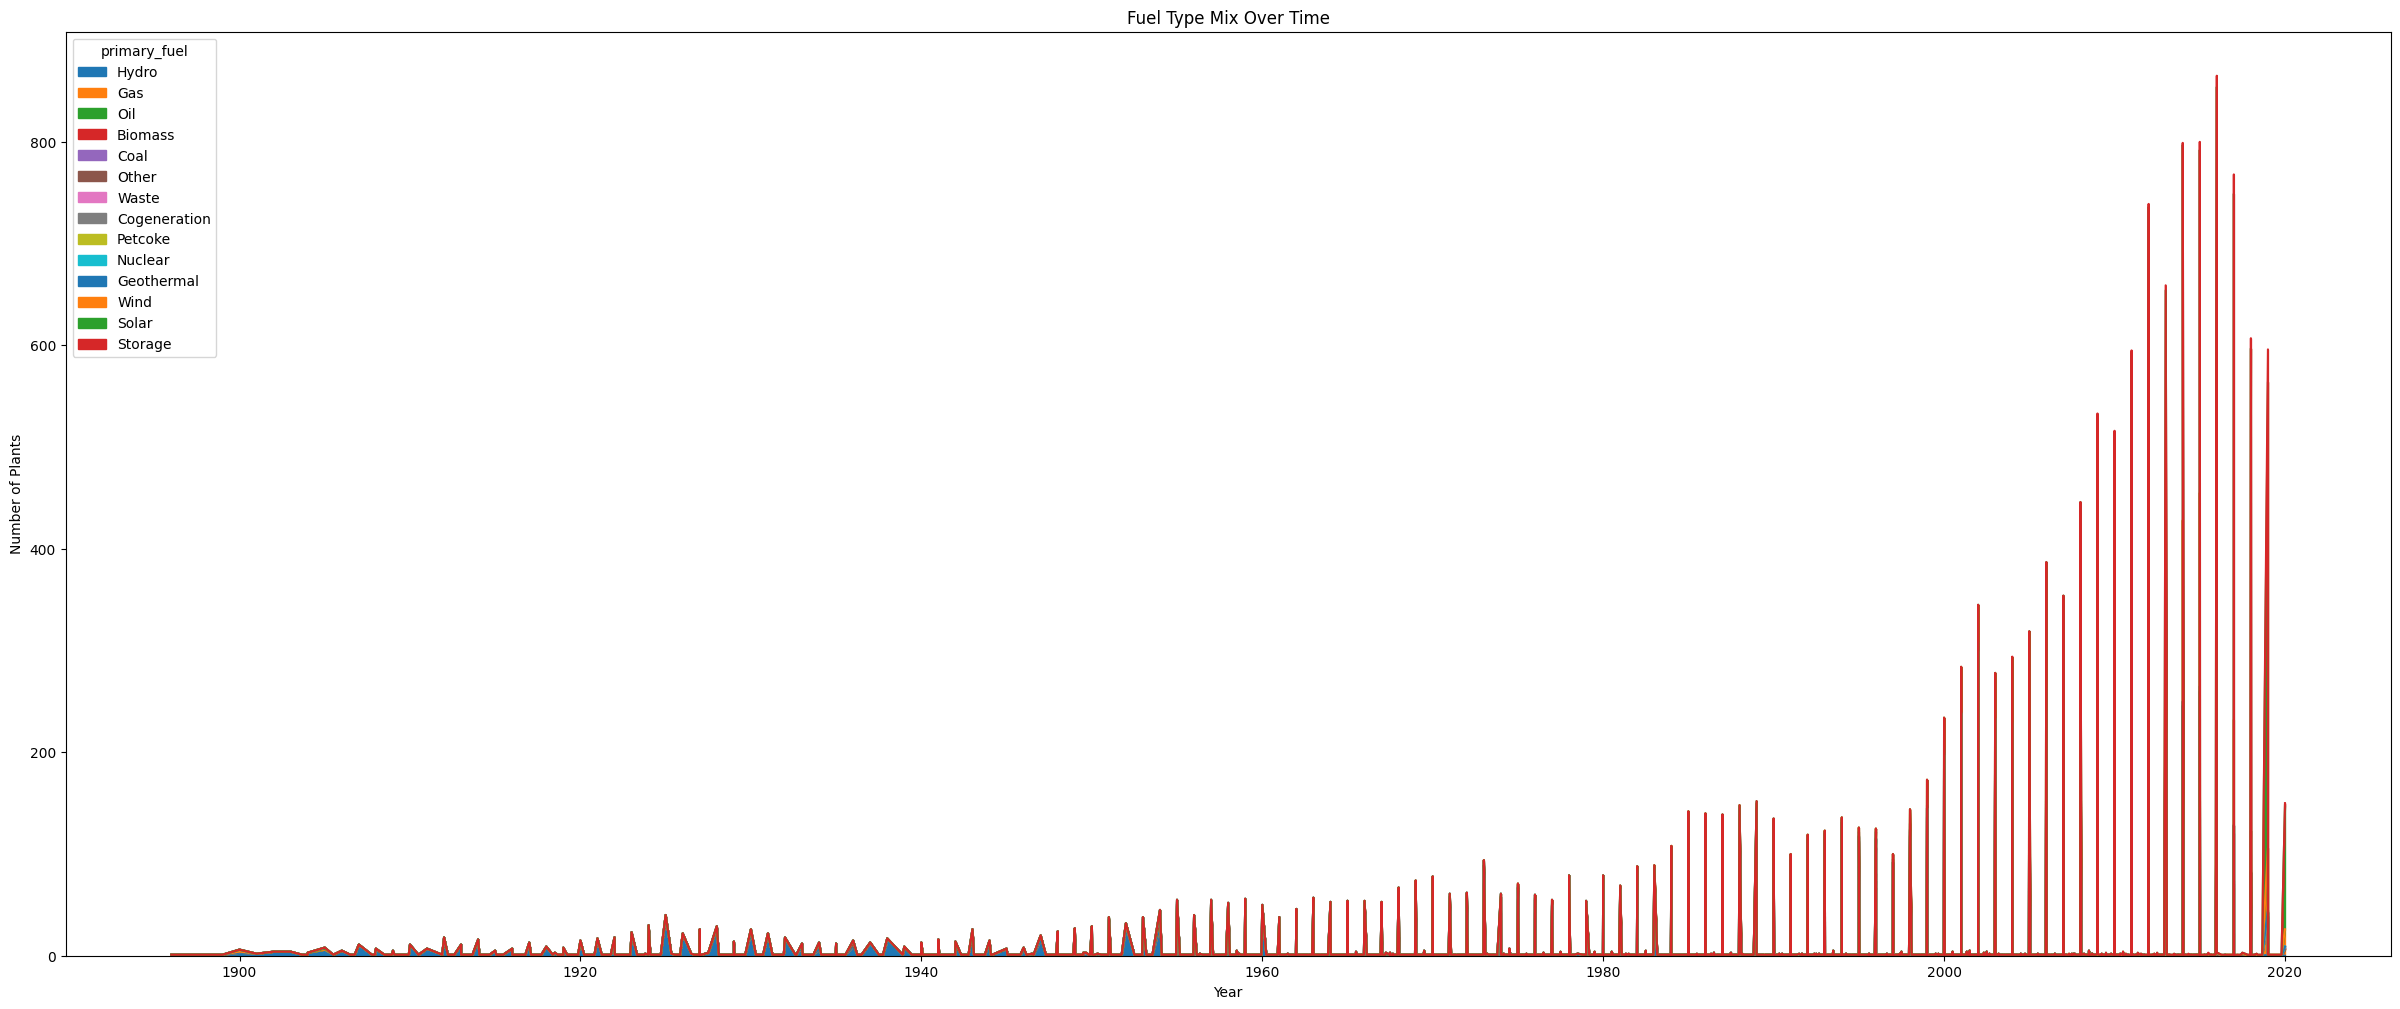

In [20]:
fuel_by_year.plot(kind='area', stacked=True, figsize=(30, 12))
plt.title('Fuel Type Mix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.show()

#Matrix Operations in Real-World Context


Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.


In [ ]:
# Pivot table as a matrix
matrix = pd.pivot_table(df, values='capacity_mw', index='fuel_type', columns='country', aggfunc='sum').fillna(0)
matrix_np = matrix.to_numpy()

# Compute covariance matrix
cov_matrix = np.cov(matrix_np)
print("Covariance Matrix:\n", cov_matrix)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

#Integrating NumPy with Pandas and Matplotlib:

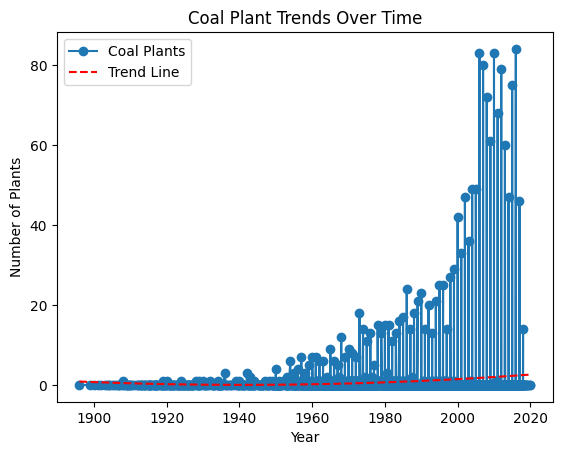

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = fuel_by_year.index.to_numpy()
y = fuel_by_year['Coal'].to_numpy()
coeffs = np.polyfit(x, y, 2)
trend = np.polyval(coeffs, x)

# Plot the original data
plt.plot(x, y, label='Coal Plants', marker='o')

# Plot the trend line
plt.plot(x, trend, '--', label='Trend Line', color='red')

plt.xlabel("Year")
plt.ylabel("Number of Plants")
plt.title("Coal Plant Trends Over Time")
plt.legend()
plt.show()
